Name: Saman Akhtar USC ID: 9944619932

**Imports**

In [423]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, hamming_loss,accuracy_score
from sklearn.svm import SVC, LinearSVC
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Multi-class and Multi-Label Classification Using Support Vector Machines 

## (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29 . Choose 70% of the data randomly as the training set.

In [424]:
frog_df = pd.read_csv('../data/Frogs_MFCCs.csv')#, header=None, na_values = '?')
frog_df.head(10)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
5,1.0,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,...,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903,Leptodactylidae,Adenomera,AdenomeraAndre,1
6,1.0,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,...,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040,Leptodactylidae,Adenomera,AdenomeraAndre,1
7,1.0,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,...,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419,Leptodactylidae,Adenomera,AdenomeraAndre,1
8,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,Leptodactylidae,Adenomera,AdenomeraAndre,1
9,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [425]:
frog_df.drop(columns='RecordID',inplace= True)

In [426]:
frog_df.shape

(7195, 25)

In [427]:
# Separating predictors and response
frog_X = frog_df.iloc[:,:-4]#,'Genus','Species']]
frog_y = frog_df.iloc[:,-3:]
frog_y.shape

(7195, 3)

In [428]:
# Splitting data
train_X,  test_X, train_y,test_y = train_test_split(frog_X, frog_y, test_size = 0.3, random_state = 50)

In [429]:
train_y['Family'].value_counts()

Leptodactylidae    3119
Hylidae            1486
Dendrobatidae       386
Bufonidae            45
Name: Family, dtype: int64

In [430]:
train_y['Species'].value_counts()

AdenomeraHylaedactylus    2443
HypsiboasCordobae          778
AdenomeraAndre             478
Ameeregatrivittata         386
HypsiboasCinerascens       316
HylaMinuta                 216
LeptodactylusFuscus        198
ScinaxRuber                 97
OsteocephalusOophagus       79
Rhinellagranulosa           45
Name: Species, dtype: int64

In [431]:
train_y['Genus'].value_counts()

Adenomera        2921
Hypsiboas        1094
Ameerega          386
Dendropsophus     216
Leptodactylus     198
Scinax             97
Osteocephalus      79
Rhinella           45
Name: Genus, dtype: int64

In [432]:
frog_d = frog_df.copy()

Factorizing the labels

In [433]:

frog_d['Family'], fam_labels = pd.factorize(frog_d['Family'])

In [434]:

frog_d['Species'], species_labels = pd.factorize(frog_d['Species'])

In [435]:

frog_d['Genus'], gen_labels = pd.factorize(frog_d['Genus'])

In [436]:
frog_d.head(5)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,0,0,0
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,0,0,0
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,0,0,0
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,0,0,0
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,0,0,0


In [437]:
# Separating predictors and response
frogX = frog_d.iloc[:,:-4]#,'Genus','Species']]
frogy = frog_d.iloc[:,-3:]
frogy.shape

(7195, 3)

In [438]:
# Splitting data
trainX,  testX, trainy,testy = train_test_split(frogX, frogy, test_size = 0.3, random_state = 50)

In [439]:
frog_X, frog_y

(      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
 0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
 1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
 2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
 3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
 4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
 ...        ...       ...       ...       ...       ...       ...       ...   
 7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
 7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
 7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
 7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
 7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   
 
       MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_12

## (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

### i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem. 

Exact match: It is a harsh approach which checks if all the label are classified correctly. 

Hamming score: Hamming-Loss is the fraction of labels that are incorrectly predicted to total no of classes. Unlike exact match it rewards for partial correct labels.

### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results. 

###### Choosing range for C and gamma

In [440]:
mod_family = SVC(C=0.01,kernel='rbf',gamma=0.1,decision_function_shape='ovr')
mod_family.fit(train_X, train_y['Family'])
family_pred = mod_family.predict(train_X)
print(accuracy_score(train_y['Family'], family_pred))

0.6199364575059572


In [441]:
mod_family = SVC(C=0.01,kernel='rbf',gamma=0.2,decision_function_shape='ovr')
mod_family.fit(train_X, train_y['Family'])
family_pred = mod_family.predict(train_X)
print(accuracy_score(train_y['Family'], family_pred))

0.7057188244638603


In [442]:
mod_family = SVC(C=1000,kernel='rbf',gamma=.2,decision_function_shape='ovr')
mod_family.fit(train_X, train_y['Family'])
family_pred = mod_family.predict(train_X)
print(accuracy_score(train_y['Family'], family_pred))

0.9994042891183479


In [443]:
mod_family = SVC(C=100,kernel='rbf',gamma=2,decision_function_shape='ovr')
mod_family.fit(train_X, train_y['Family'])
family_pred = mod_family.predict(train_X)
print(accuracy_score(train_y['Family'], family_pred))

1.0


In [444]:
mod_family = SVC(C=1000,kernel='rbf',gamma=2,decision_function_shape='ovr')
mod_family.fit(train_X, train_y['Family'])
family_pred = mod_family.predict(train_X)
print(accuracy_score(train_y['Family'], family_pred))

1.0


For C=0.001,we get low accuracy even with high gamma. WIth C= 0.01 and gamma .1 we get accuracy as 62% . When gamma increase to .2, we achieve accuracy as 70 %
So keeping threshold as 70 % accuracy . Lower limit of gamma is .2 and C is .01
And upper limit for gamma as 2 and C as 10 ^ 3.


In [445]:
np.logspace(start = -2,stop = 3, num = 6)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [446]:
# Set the parameters by cross-validation
tuned_params = [{ 'gamma': np.arange(.2,2.1,.1), 'C': np.logspace(start = -2,stop = 3, num = 6)}]


###### Gaus  SVC without standardization

In [447]:
def chooseParam( train_X, train_y, test_X, test_y, model = SVC(kernel='rbf'),tuned_params=tuned_params):
    model = GridSearchCV(estimator=model, param_grid = tuned_params, scoring = 'f1_weighted', n_jobs = -1,\
                       cv = StratifiedKFold(10, random_state = 100, shuffle=True) )
    
    # Fit the classifier
    model.fit(train_X, train_y)
    
    print("Grid scores are:\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print("\nThe best parameters are:\n",model.best_params_)
    print("\n The best score for the SVM is:\n",model.best_score_)
    # Predict the output for  test data
    test_pred = model.predict(test_X)
   
    # Display the classification report
    print("The classification report:\n",classification_report(test_y, test_pred))
    return model

##### For Family 

In [448]:
# Finding best params: C and gamma for Family label
gaus_family = chooseParam(trainX, trainy['Family'], testX, testy['Family'])

Grid scores are:

0.620 (+/-0.022) for {'C': 0.01, 'gamma': 0.2}
0.776 (+/-0.013) for {'C': 0.01, 'gamma': 0.30000000000000004}
0.804 (+/-0.016) for {'C': 0.01, 'gamma': 0.4000000000000001}
0.806 (+/-0.020) for {'C': 0.01, 'gamma': 0.5000000000000001}
0.807 (+/-0.021) for {'C': 0.01, 'gamma': 0.6000000000000001}
0.811 (+/-0.019) for {'C': 0.01, 'gamma': 0.7000000000000002}
0.817 (+/-0.020) for {'C': 0.01, 'gamma': 0.8000000000000003}
0.822 (+/-0.021) for {'C': 0.01, 'gamma': 0.9000000000000001}
0.824 (+/-0.018) for {'C': 0.01, 'gamma': 1.0000000000000002}
0.826 (+/-0.019) for {'C': 0.01, 'gamma': 1.1000000000000003}
0.826 (+/-0.018) for {'C': 0.01, 'gamma': 1.2000000000000004}
0.826 (+/-0.020) for {'C': 0.01, 'gamma': 1.3000000000000003}
0.827 (+/-0.018) for {'C': 0.01, 'gamma': 1.4000000000000004}
0.826 (+/-0.018) for {'C': 0.01, 'gamma': 1.5000000000000004}
0.826 (+/-0.018) for {'C': 0.01, 'gamma': 1.6000000000000003}
0.826 (+/-0.017) for {'C': 0.01, 'gamma': 1.7000000000000004}
0.82

In [449]:
# Finding best params: C and gamma for Family label
gaus_family = chooseParam(trainX, trainy['Family'], testX, testy['Family'])

Grid scores are:

0.620 (+/-0.022) for {'C': 0.01, 'gamma': 0.2}
0.776 (+/-0.013) for {'C': 0.01, 'gamma': 0.30000000000000004}
0.804 (+/-0.016) for {'C': 0.01, 'gamma': 0.4000000000000001}
0.806 (+/-0.020) for {'C': 0.01, 'gamma': 0.5000000000000001}
0.807 (+/-0.021) for {'C': 0.01, 'gamma': 0.6000000000000001}
0.811 (+/-0.019) for {'C': 0.01, 'gamma': 0.7000000000000002}
0.817 (+/-0.020) for {'C': 0.01, 'gamma': 0.8000000000000003}
0.822 (+/-0.021) for {'C': 0.01, 'gamma': 0.9000000000000001}
0.824 (+/-0.018) for {'C': 0.01, 'gamma': 1.0000000000000002}
0.826 (+/-0.019) for {'C': 0.01, 'gamma': 1.1000000000000003}
0.826 (+/-0.018) for {'C': 0.01, 'gamma': 1.2000000000000004}
0.826 (+/-0.020) for {'C': 0.01, 'gamma': 1.3000000000000003}
0.827 (+/-0.018) for {'C': 0.01, 'gamma': 1.4000000000000004}
0.826 (+/-0.018) for {'C': 0.01, 'gamma': 1.5000000000000004}
0.826 (+/-0.018) for {'C': 0.01, 'gamma': 1.6000000000000003}
0.826 (+/-0.017) for {'C': 0.01, 'gamma': 1.7000000000000004}
0.82

In [450]:
# Fit data with SVM classifeir with Gausian kernel and Oner vs all
# And report F1 score, confusion matrix, exact and hamming score
def oneVsallDisplay(model, train_X, train_y, test_X, test_y, label  ):
    # Fit One vs all SVM
    ova_svm = OneVsRestClassifier(SVC(kernel='rbf', C = model.best_params_['C'], gamma = model.best_params_['gamma'], probability=True))
    ova_svm_fit =  ova_svm.fit(train_X, train_y)
    
    # For training data
    pred_y_train = ova_svm_fit.predict(train_X)
    print("The confusion matrix of the training data for the label: ",label," is:\n",confusion_matrix(train_y, pred_y_train))
    print("F1-score:  of the training data for the label %s is:\n%0.3f "  %(label, f1_score(train_y, pred_y_train, average='weighted'))) 
    
    # For testing data
    pred_y_test = ova_svm_fit.predict(test_X)
    print("The confusion matrix of the testing data for the label: ",label," is:\n",confusion_matrix(test_y, pred_y_test))
    print("F1-score:  of the testing data for the label %s is:\n%0.3f "  %(label , f1_score(test_y, pred_y_test, average='weighted'))) 
    
    # Calculating hamming loss and exact match for each label
    print("The hamming loss of the testing data for the label: ",label," is:\n",hamming_loss(test_y, pred_y_test))
    print("The exact match or the accuracy score of the testing data for the label: ",label," is:\n",\
          accuracy_score(test_y, pred_y_test))
    return test_y, pred_y_test

In [451]:
test_y_fam, pred_y_fam = oneVsallDisplay(gaus_family, trainX, trainy['Family'], testX, testy['Family'],'Family')

The confusion matrix of the training data for the label:  Family  is:
 [[3119    0    0    0]
 [   0  386    0    0]
 [   0    0 1486    0]
 [   0    0    0   45]]
F1-score:  of the training data for the label Family is:
1.000 
The confusion matrix of the testing data for the label:  Family  is:
 [[1289    1   11    0]
 [   0  156    0    0]
 [   3    0  673    3]
 [   0    0    1   22]]
F1-score:  of the testing data for the label Family is:
0.991 
The hamming loss of the testing data for the label:  Family  is:
 0.008800370541917554
The exact match or the accuracy score of the testing data for the label:  Family  is:
 0.9911996294580825


In [452]:
true_arr = np.array([])
pred_arr = np.array([])

##### For Genus

In [453]:
gaus_genus = chooseParam(trainX, trainy['Genus'], testX, testy['Genus'])

Grid scores are:

0.517 (+/-0.032) for {'C': 0.01, 'gamma': 0.2}
0.583 (+/-0.041) for {'C': 0.01, 'gamma': 0.30000000000000004}
0.679 (+/-0.016) for {'C': 0.01, 'gamma': 0.4000000000000001}
0.697 (+/-0.007) for {'C': 0.01, 'gamma': 0.5000000000000001}
0.699 (+/-0.004) for {'C': 0.01, 'gamma': 0.6000000000000001}
0.701 (+/-0.004) for {'C': 0.01, 'gamma': 0.7000000000000002}
0.702 (+/-0.005) for {'C': 0.01, 'gamma': 0.8000000000000003}
0.701 (+/-0.006) for {'C': 0.01, 'gamma': 0.9000000000000001}
0.701 (+/-0.006) for {'C': 0.01, 'gamma': 1.0000000000000002}
0.700 (+/-0.006) for {'C': 0.01, 'gamma': 1.1000000000000003}
0.700 (+/-0.007) for {'C': 0.01, 'gamma': 1.2000000000000004}
0.700 (+/-0.009) for {'C': 0.01, 'gamma': 1.3000000000000003}
0.699 (+/-0.012) for {'C': 0.01, 'gamma': 1.4000000000000004}
0.702 (+/-0.016) for {'C': 0.01, 'gamma': 1.5000000000000004}
0.710 (+/-0.019) for {'C': 0.01, 'gamma': 1.6000000000000003}
0.718 (+/-0.010) for {'C': 0.01, 'gamma': 1.7000000000000004}
0.72

In [454]:
test_y_gen, pred_y_gen = oneVsallDisplay(gaus_genus, trainX, trainy['Genus'], testX, testy['Genus'],'Genus')

The confusion matrix of the training data for the label:  Genus  is:
 [[2920    0    1    0    0    0    0    0]
 [   0  386    0    0    0    0    0    0]
 [   3    0  213    0    0    0    0    0]
 [   0    0    0 1094    0    0    0    0]
 [   0    0    0    0  198    0    0    0]
 [   0    0    0    2    0   77    0    0]
 [   0    0    0    0    0    0   45    0]
 [   0    0    0    0    0    0    0   97]]
F1-score:  of the training data for the label Genus is:
0.999 
The confusion matrix of the testing data for the label:  Genus  is:
 [[1223    1    2    2    0    1    0    0]
 [   0  156    0    0    0    0    0    0]
 [   6    0   88    0    0    0    0    0]
 [   1    0    0  498    0    0    0    0]
 [   0    1    0    2   69    0    0    0]
 [   0    0    0    2    0   33    0    0]
 [   0    0    0    0    1    0   22    0]
 [   1    0    0    0    0    0    1   49]]
F1-score:  of the testing data for the label Genus is:
0.990 
The hamming loss of the testing data for the l

##### For Species

In [455]:
gaus_species = chooseParam(trainX, trainy['Species'], testX, testy['Species'])

Grid scores are:

0.465 (+/-0.020) for {'C': 0.01, 'gamma': 0.2}
0.582 (+/-0.014) for {'C': 0.01, 'gamma': 0.30000000000000004}
0.652 (+/-0.011) for {'C': 0.01, 'gamma': 0.4000000000000001}
0.724 (+/-0.023) for {'C': 0.01, 'gamma': 0.5000000000000001}
0.752 (+/-0.030) for {'C': 0.01, 'gamma': 0.6000000000000001}
0.765 (+/-0.024) for {'C': 0.01, 'gamma': 0.7000000000000002}
0.776 (+/-0.022) for {'C': 0.01, 'gamma': 0.8000000000000003}
0.784 (+/-0.017) for {'C': 0.01, 'gamma': 0.9000000000000001}
0.786 (+/-0.017) for {'C': 0.01, 'gamma': 1.0000000000000002}
0.787 (+/-0.017) for {'C': 0.01, 'gamma': 1.1000000000000003}
0.789 (+/-0.016) for {'C': 0.01, 'gamma': 1.2000000000000004}
0.790 (+/-0.018) for {'C': 0.01, 'gamma': 1.3000000000000003}
0.790 (+/-0.017) for {'C': 0.01, 'gamma': 1.4000000000000004}
0.791 (+/-0.016) for {'C': 0.01, 'gamma': 1.5000000000000004}
0.791 (+/-0.017) for {'C': 0.01, 'gamma': 1.6000000000000003}
0.791 (+/-0.017) for {'C': 0.01, 'gamma': 1.7000000000000004}
0.79

In [456]:
test_y_spec, pred_y_spec = oneVsallDisplay(gaus_species, trainX, trainy['Species'], testX, testy['Species'],'Species')

The confusion matrix of the training data for the label:  Species  is:
 [[ 478    0    0    0    0    0    0    0    0    0]
 [   0  386    0    0    0    0    0    0    0    0]
 [   0    0 2443    0    0    0    0    0    0    0]
 [   0    0    0  216    0    0    0    0    0    0]
 [   0    0    0    0  316    0    0    0    0    0]
 [   0    0    0    0    0  778    0    0    0    0]
 [   0    0    0    0    0    0  198    0    0    0]
 [   0    0    0    0    0    0    0   79    0    0]
 [   0    0    0    0    0    0    0    0   45    0]
 [   0    0    0    0    0    0    0    0    0   97]]
F1-score:  of the training data for the label Species is:
1.000 
The confusion matrix of the testing data for the label:  Species  is:
 [[ 190    1    0    1    0    1    0    1    0    0]
 [   0  156    0    0    0    0    0    0    0    0]
 [   0    0 1031    3    0    1    0    0    0    0]
 [   0    0    4   90    0    0    0    0    0    0]
 [   0    0    0    0  156    0    0    0    0   

##### Calculating hamming loss and exact match for whole data set

In [457]:
# Storing true and predicted value of labels
true_arr = np.vstack([test_y_fam,test_y_gen,test_y_spec])#(true_arr,test_y_fam)
pred_arr =  np.vstack([pred_y_fam, pred_y_gen, pred_y_spec] )

pred_arr.shape

(3, 2159)

In [458]:
def exact_score(y_true, y_pred):
  
    true_val = np.array([])
    pred_val =  np.array([])
    
    # Exact match
    for j in range(y_true.shape[1]):
        true_val = np.append(true_val,(str(y_true[0,j])+ str(y_true[1,j]) +str(y_true[2,j])))
        pred_val = np.append(pred_val,(str(y_pred[0,j])+str(y_pred[1,j])+str(y_pred[2,j])))
       
    exact_match = sum(true_val == pred_val)/len(true_val)
    return exact_match

# Hamming score
def hamm_loss(true_arr, pred_arr, avg_dist = False):
    sums = np.sum(np.not_equal(true_arr[2],pred_arr[2])) + \
    np.sum(np.not_equal(true_arr[1],pred_arr[1])) + np.sum(np.not_equal(true_arr[0],pred_arr[0]))
    denom = true_arr.shape[0] * true_arr.shape[1]
    ham_loss = sums/denom
    
    # Calculate avg hamming distance
    if avg_dist == True:
        avg_ham_dist = sums/true_arr.shape[1]
        return avg_ham_dist, ham_loss
    
    return ham_loss



In [459]:
ham_loss = hamm_loss(true_arr, pred_arr)
exact = exact_score(true_arr,pred_arr)
print("The exact match score of whole dataset for SVM with one vs all Gaussian kernel is: ", exact)
print("The hamminng score of the whole dataset for SVM with one vs all Gaussian kernel is: ", ham_loss)

The exact match score of whole dataset for SVM with one vs all Gaussian kernel is:  0.9861046780917091
The hamminng score of the whole dataset for SVM with one vs all Gaussian kernel is:  0.009572332870155936


**Summary**

SVM with Gaussian kernels and one versus all classifier performed well as the exact match is high and hamming loss of the classifier is low, although the labels are imbalanced.

### iii. Repeat 1(b)ii with L 1 -penalized SVMs. 3 Remember to standardize 4 the at- tributes. Determine the weight of the SVM penalty using 10 fold cross vali- dation. 

In [460]:
# Function to standardize
def stdscaler(input):
    scaler = StandardScaler()
    val_x = scaler.fit_transform(input)
    val_x = pd.DataFrame(val_x)
    val_x.columns = input.columns
    return val_x

In [461]:
std_trainX  = stdscaler(trainX)
std_testX = stdscaler(testX)

In [462]:
c_params = [{'C': np.logspace(start = -3,stop = 6, num = 10)}]
model_cls = LinearSVC(penalty='l1', multi_class='ovr',dual=False)

##### For Family: L1 penalized SVM

###### Standardized data

In [463]:
fam_l1_std = chooseParam(std_trainX, trainy['Family'], std_testX, testy['Family'],model_cls, c_params)

Grid scores are:

0.828 (+/-0.027) for {'C': 0.001}
0.921 (+/-0.012) for {'C': 0.01}
0.932 (+/-0.010) for {'C': 0.1}
0.933 (+/-0.012) for {'C': 1.0}
0.932 (+/-0.012) for {'C': 10.0}
0.933 (+/-0.012) for {'C': 100.0}
0.933 (+/-0.012) for {'C': 1000.0}
0.933 (+/-0.012) for {'C': 10000.0}
0.933 (+/-0.012) for {'C': 100000.0}
0.933 (+/-0.012) for {'C': 1000000.0}

The best parameters are:
 {'C': 1.0}

 The best score for the SVM is:
 0.9329406321980667
The classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1301
           1       0.86      0.89      0.88       156
           2       0.92      0.90      0.91       679
           3       0.00      0.00      0.00        23

    accuracy                           0.93      2159
   macro avg       0.68      0.69      0.69      2159
weighted avg       0.92      0.93      0.93      2159



In [464]:
# Fit data with L1-penalized SVMs
# And report F1 score, confusion matrix, exact and hamming score
def l1AllDisplay(model, train_X, train_y, test_X, test_y, label  ):
    
    # Fit One vs all SVM
    l1_ova =  LinearSVC(penalty='l1',C=model.best_params_['C'], multi_class='ovr',dual=False)
    l1_fit =  l1_ova.fit(train_X, train_y)
    
    # For training data
    pred_y_train = l1_fit.predict(train_X)
    print("The confusion matrix of the training data for the label: ",label," is:\n",confusion_matrix(train_y, pred_y_train))
    print("F1-score:  of the training data for the label %s is:\n%0.3f "  %(label, f1_score(train_y, pred_y_train, average='weighted'))) 
    
    # For testing data
    pred_y_test = l1_fit.predict(test_X)
    print("The confusion matrix of the testing data for the label: ",label," is:\n",confusion_matrix(test_y, pred_y_test))
    print("F1-score:  of the testing data for the label %s is:\n%0.3f "  %(label , f1_score(test_y, pred_y_test, average='weighted'))) 
    
    # Calculating hamming loss and exact match for each label
    print("The hamming loss of the testing data for the label: ",label," is:\n",hamming_loss(test_y, pred_y_test))
    print("The exact match or the accuracy score of the testing data for the label: ",label," is:\n",\
          accuracy_score(test_y, pred_y_test))
    return test_y, pred_y_test

In [465]:
test_y_fam_l1_std, pred_y_fam_l1_std = l1AllDisplay(fam_l1_std, std_trainX, trainy['Family'], std_testX, testy['Family'],'Family')

The confusion matrix of the training data for the label:  Family  is:
 [[3038   23   58    0]
 [   8  350   28    0]
 [ 125   13 1348    0]
 [   6    0   39    0]]
F1-score:  of the training data for the label Family is:
0.936 
The confusion matrix of the testing data for the label:  Family  is:
 [[1265   10   26    0]
 [  10  139    7    0]
 [  55   12  611    1]
 [   1    0   22    0]]
F1-score:  of the testing data for the label Family is:
0.928 
The hamming loss of the testing data for the label:  Family  is:
 0.0666975451597962
The exact match or the accuracy score of the testing data for the label:  Family  is:
 0.9333024548402038


###### Raw data

In [466]:
fam_l1 = chooseParam(trainX, trainy['Family'], testX, testy['Family'],model_cls, c_params)

Grid scores are:

0.474 (+/-0.002) for {'C': 0.001}
0.871 (+/-0.018) for {'C': 0.01}
0.925 (+/-0.016) for {'C': 0.1}
0.932 (+/-0.010) for {'C': 1.0}
0.933 (+/-0.011) for {'C': 10.0}
0.932 (+/-0.011) for {'C': 100.0}
0.932 (+/-0.011) for {'C': 1000.0}
0.932 (+/-0.011) for {'C': 10000.0}
0.932 (+/-0.011) for {'C': 100000.0}
0.932 (+/-0.011) for {'C': 1000000.0}

The best parameters are:
 {'C': 10.0}

 The best score for the SVM is:
 0.9332035500122334
The classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1301
           1       0.85      0.89      0.87       156
           2       0.92      0.90      0.91       679
           3       0.00      0.00      0.00        23

    accuracy                           0.93      2159
   macro avg       0.68      0.69      0.69      2159
weighted avg       0.92      0.93      0.93      2159



The best score for both standardized data(0.9329) and raw data (0.933) is nearly same .


In [467]:
test_y_fam_l1, pred_y_fam_l1 = l1AllDisplay(fam_l1, trainX, trainy['Family'], testX, testy['Family'],'Family')

The confusion matrix of the training data for the label:  Family  is:
 [[3037   23   59    0]
 [   8  348   30    0]
 [ 125   14 1347    0]
 [   6    0   39    0]]
F1-score:  of the training data for the label Family is:
0.935 
The confusion matrix of the testing data for the label:  Family  is:
 [[1264   11   26    0]
 [  10  139    7    0]
 [  52   13  613    1]
 [   1    0   22    0]]
F1-score:  of the testing data for the label Family is:
0.929 
The hamming loss of the testing data for the label:  Family  is:
 0.06623436776285317
The exact match or the accuracy score of the testing data for the label:  Family  is:
 0.9337656322371468


Even the hamming loss and exact match is nearly same.Hence going ahead without standardizing as it seems data is already normalized

##### For Genus: L1 penalized SVM

###### Standardized data

In [468]:
gen_l1_std = chooseParam(std_trainX, trainy['Genus'], std_testX, testy['Genus'],model_cls, c_params)

Grid scores are:

0.767 (+/-0.015) for {'C': 0.001}
0.885 (+/-0.026) for {'C': 0.01}
0.929 (+/-0.028) for {'C': 0.1}
0.941 (+/-0.024) for {'C': 1.0}
0.943 (+/-0.023) for {'C': 10.0}
0.943 (+/-0.022) for {'C': 100.0}
0.943 (+/-0.022) for {'C': 1000.0}
0.943 (+/-0.022) for {'C': 10000.0}
0.943 (+/-0.022) for {'C': 100000.0}
0.943 (+/-0.022) for {'C': 1000000.0}

The best parameters are:
 {'C': 10000.0}

 The best score for the SVM is:
 0.9431871126877693
The classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1229
           1       0.90      0.94      0.92       156
           2       0.90      0.64      0.75        94
           3       0.94      0.98      0.96       499
           4       0.95      0.88      0.91        72
           5       0.89      0.49      0.63        35
           6       1.00      0.48      0.65        23
           7       0.96      0.94      0.95        51

    accuracy               

In [469]:
test_y_gen_l1_std, pred_y_gen_l1_std = l1AllDisplay(gen_l1_std, std_trainX, trainy['Genus'], std_testX, testy['Genus'],'Genus')

The confusion matrix of the training data for the label:  Genus  is:
 [[2882   18    8   10    0    0    0    3]
 [   7  369    9    1    0    0    0    0]
 [  50    6  149   11    0    0    0    0]
 [  25    0    1 1066    2    0    0    0]
 [   2    0    2   11  183    0    0    0]
 [   3    0    0   34    0   42    0    0]
 [  15    0    0   10    1    0   19    0]
 [   0    0    0    4    0    0    0   93]]
F1-score:  of the training data for the label Genus is:
0.951 
The confusion matrix of the testing data for the label:  Genus  is:
 [[1211    8    2    5    0    2    0    1]
 [   7  147    1    1    0    0    0    0]
 [  24    8   60    2    0    0    0    0]
 [   6    0    0  490    2    0    0    1]
 [   3    0    4    2   63    0    0    0]
 [   1    0    0   17    0   17    0    0]
 [  11    0    0    0    1    0   11    0]
 [   1    0    0    2    0    0    0   48]]
F1-score:  of the testing data for the label Genus is:
0.945 
The hamming loss of the testing data for the l

###### Raw data

In [470]:
gen_l1 = chooseParam(trainX, trainy['Genus'], testX, testy['Genus'],model_cls, c_params)

Grid scores are:

0.426 (+/-0.002) for {'C': 0.001}
0.778 (+/-0.015) for {'C': 0.01}
0.899 (+/-0.023) for {'C': 0.1}
0.933 (+/-0.028) for {'C': 1.0}
0.940 (+/-0.026) for {'C': 10.0}
0.941 (+/-0.024) for {'C': 100.0}
0.942 (+/-0.026) for {'C': 1000.0}
0.942 (+/-0.026) for {'C': 10000.0}
0.942 (+/-0.026) for {'C': 100000.0}
0.942 (+/-0.025) for {'C': 1000000.0}

The best parameters are:
 {'C': 1000.0}

 The best score for the SVM is:
 0.9423279093879969
The classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1229
           1       0.89      0.94      0.91       156
           2       0.88      0.61      0.72        94
           3       0.94      0.98      0.96       499
           4       0.95      0.86      0.91        72
           5       0.89      0.46      0.60        35
           6       0.92      0.52      0.67        23
           7       0.96      0.94      0.95        51

    accuracy                

The best score for both standardized data(0.943) and raw data (0.942) is almost same .

In [471]:
test_y_gen_l1, pred_y_gen_l1 = l1AllDisplay(gen_l1, trainX, trainy['Genus'], testX, testy['Genus'],'Genus')

The confusion matrix of the training data for the label:  Genus  is:
 [[2883   19    6   11    0    0    0    2]
 [   6  368   10    2    0    0    0    0]
 [  51    6  148   11    0    0    0    0]
 [  25    0    1 1066    2    0    0    0]
 [   2    0    2   12  182    0    0    0]
 [   3    0    0   33    0   43    0    0]
 [  15    0    0   10    1    0   19    0]
 [   0    0    0    5    0    0    0   92]]
F1-score:  of the training data for the label Genus is:
0.951 
The confusion matrix of the testing data for the label:  Genus  is:
 [[1209    8    3    6    0    2    0    1]
 [   8  147    0    1    0    0    0    0]
 [  24   10   57    2    0    0    1    0]
 [   6    1    0  489    2    0    0    1]
 [   3    0    4    3   62    0    0    0]
 [   1    0    0   18    0   16    0    0]
 [   9    0    0    1    1    0   12    0]
 [   1    0    0    2    0    0    0   48]]
F1-score:  of the testing data for the label Genus is:
0.941 
The hamming loss of the testing data for the l

Even the hamming loss and exact match is nearly same with very little difference.Hence going ahead without standardizing as it seems data is already normalized

##### For Species: L1 penalized SVM

###### Standardized data

In [472]:
spec_l1_std = chooseParam(std_trainX, trainy['Species'], std_testX, testy['Species'],model_cls, c_params)

Grid scores are:

0.734 (+/-0.013) for {'C': 0.001}
0.889 (+/-0.015) for {'C': 0.01}
0.940 (+/-0.017) for {'C': 0.1}
0.952 (+/-0.013) for {'C': 1.0}
0.953 (+/-0.013) for {'C': 10.0}
0.954 (+/-0.012) for {'C': 100.0}
0.954 (+/-0.012) for {'C': 1000.0}
0.954 (+/-0.012) for {'C': 10000.0}
0.954 (+/-0.012) for {'C': 100000.0}
0.954 (+/-0.012) for {'C': 1000000.0}

The best parameters are:
 {'C': 100.0}

 The best score for the SVM is:
 0.9541070543249077
The classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       194
           1       0.90      0.94      0.92       156
           2       0.99      1.00      0.99      1035
           3       0.88      0.71      0.79        94
           4       0.92      0.94      0.93       156
           5       0.94      0.97      0.96       343
           6       0.96      0.89      0.92        72
           7       0.91      0.57      0.70        35
           8       0.88      0

In [473]:
test_y_spec_l1_std, pred_y_spec_l1_std = l1AllDisplay(spec_l1_std, std_trainX, trainy['Species'], std_testX, testy['Species'],'Species')

The confusion matrix of the training data for the label:  Species  is:
 [[ 449   17    0    2    0    8    0    0    0    2]
 [   4  370    0   10    0    1    0    0    1    0]
 [   0    1 2440    0    1    0    0    0    0    1]
 [  21    7   16  163    0    9    0    0    0    0]
 [   9    0    0    0  295    9    2    0    1    0]
 [   0    0    4    2   11  757    1    0    1    2]
 [   1    0    1    2    2    5  187    0    0    0]
 [   1    0    0    0   10   20    0   47    1    0]
 [   2    0    1    0    0    3    1    0   38    0]
 [   0    0    0    1    0    0    0    0    0   96]]
F1-score:  of the training data for the label Species is:
0.960 
The confusion matrix of the testing data for the label:  Species  is:
 [[ 183    5    0    1    0    3    0    1    0    1]
 [   5  146    0    2    1    1    0    0    1    0]
 [   0    0 1033    1    0    1    0    0    0    0]
 [   7   10    7   67    0    3    0    0    0    0]
 [   5    1    0    0  147    3    0    0    0   

######  Raw data

In [474]:
spec_l1 = chooseParam(trainX, trainy['Species'], testX, testy['Species'],model_cls, c_params)

Grid scores are:

0.319 (+/-0.005) for {'C': 0.001}
0.769 (+/-0.023) for {'C': 0.01}
0.908 (+/-0.024) for {'C': 0.1}
0.947 (+/-0.017) for {'C': 1.0}
0.952 (+/-0.012) for {'C': 10.0}
0.953 (+/-0.012) for {'C': 100.0}
0.953 (+/-0.012) for {'C': 1000.0}
0.953 (+/-0.013) for {'C': 10000.0}
0.953 (+/-0.013) for {'C': 100000.0}
0.953 (+/-0.012) for {'C': 1000000.0}

The best parameters are:
 {'C': 10000.0}

 The best score for the SVM is:
 0.9534705791204283
The classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       194
           1       0.89      0.94      0.91       156
           2       0.99      1.00      0.99      1035
           3       0.89      0.68      0.77        94
           4       0.92      0.94      0.93       156
           5       0.94      0.97      0.95       343
           6       0.96      0.89      0.92        72
           7       0.91      0.57      0.70        35
           8       0.85     

Here also the best score for both standardized data(0.954) and raw data (0.9537) is nearly same .

In [475]:
test_y_spec_l1, pred_y_spec_l1 = l1AllDisplay(spec_l1, trainX, trainy['Species'], testX, testy['Species'],'Species')

The confusion matrix of the training data for the label:  Species  is:
 [[ 448   19    0    2    0    7    0    0    0    2]
 [   4  367    0   11    0    3    0    0    1    0]
 [   0    2 2439    0    1    0    0    0    0    1]
 [  22    8   16  161    0    9    0    0    0    0]
 [   9    0    0    0  295    9    2    0    1    0]
 [   0    0    4    2   12  756    1    0    1    2]
 [   1    0    1    2    2    6  186    0    0    0]
 [   1    0    0    0   10   20    0   47    1    0]
 [   2    0    1    0    0    3    1    0   38    0]
 [   0    0    0    1    0    0    0    0    0   96]]
F1-score:  of the training data for the label Species is:
0.958 
The confusion matrix of the testing data for the label:  Species  is:
 [[ 183    6    0    0    0    3    0    1    0    1]
 [   5  146    0    2    1    1    0    0    1    0]
 [   0    0 1033    1    0    1    0    0    0    0]
 [   7   12    7   64    0    3    0    0    1    0]
 [   5    0    0    0  147    4    0    0    0   

Even the hamming loss and exact match is nearly same.Hence going ahead without standardizing as it seems data is already normalized

##### Calculating hamming loss and exact match for whole data set for L1 penalized SVM

In [476]:
true_arr_l1 = np.array([])
pred_arr_l1 = np.array([])

In [477]:
# Storing true and predicted value of labels
true_arr_l1 = np.vstack([test_y_fam_l1,test_y_gen_l1,test_y_spec_l1])#(true_arr,test_y_fam)
pred_arr_l1 =  np.vstack([pred_y_fam_l1, pred_y_gen_l1, pred_y_spec_l1] )

pred_arr_l1.shape

(3, 2159)

In [478]:
ham_loss_l1 = hamm_loss(true_arr_l1, pred_arr_l1)
exact_scorel1 = exact_score(true_arr_l1, pred_arr_l1)
print("The exact match score of whole dataset for L1 penalized SVM  is: ", exact_scorel1)
print("The hamminng score of the whole dataset for L1 penalized SVM  is: ", ham_loss_l1)

The exact match score of whole dataset for L1 penalized SVM  is:  0.9096804075961094
The hamminng score of the whole dataset for L1 penalized SVM  is:  0.05573568009881118


**Summary**

SVM with L1 penalized data has problem with classification of minority class. Thus we can see low exact match  and higher hamming score as compared to SVM with Gaussian kernels and one versus all classifier.

### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

##### For Family: L1 penalized SVM with Smote 

In [479]:
def smoteData( Xtrain, Ytrain):
    smote = SMOTE(random_state = 50)
    Xsmote, Ysmote = smote.fit_resample(Xtrain, Ytrain)
    Xsmote_df = pd.DataFrame(data = Xsmote, columns=Xtrain.columns)
    Ysmote_df = pd.DataFrame(data = Ysmote)
    return Xsmote_df, Ysmote_df

##### Standardized Data

In [480]:
X_fam_smote_std, Y_fam_smote_std = smoteData(std_trainX, trainy['Family'])

In [481]:
fam_smote = chooseParam(X_fam_smote_std, Y_fam_smote_std, std_testX, testy['Family'],model_cls, c_params)

Grid scores are:

0.883 (+/-0.013) for {'C': 0.001}
0.931 (+/-0.009) for {'C': 0.01}
0.948 (+/-0.014) for {'C': 0.1}
0.950 (+/-0.014) for {'C': 1.0}
0.951 (+/-0.014) for {'C': 10.0}
0.951 (+/-0.014) for {'C': 100.0}
0.951 (+/-0.014) for {'C': 1000.0}
0.951 (+/-0.014) for {'C': 10000.0}
0.951 (+/-0.014) for {'C': 100000.0}
0.951 (+/-0.014) for {'C': 1000000.0}

The best parameters are:
 {'C': 10000.0}

 The best score for the SVM is:
 0.9505290581492154
The classification report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      1301
           1       0.77      0.96      0.85       156
           2       0.93      0.87      0.90       679
           3       0.30      0.91      0.45        23

    accuracy                           0.92      2159
   macro avg       0.74      0.92      0.79      2159
weighted avg       0.93      0.92      0.92      2159



##### Raw Data

In [482]:
X_fam_smote, Y_fam_smote = smoteData(trainX, trainy['Family'])

In [483]:
fam_smote_raw = chooseParam(X_fam_smote, Y_fam_smote, testX, testy['Family'],model_cls, c_params)

Grid scores are:

0.815 (+/-0.017) for {'C': 0.001}
0.882 (+/-0.013) for {'C': 0.01}
0.933 (+/-0.011) for {'C': 0.1}
0.948 (+/-0.014) for {'C': 1.0}
0.949 (+/-0.014) for {'C': 10.0}
0.949 (+/-0.013) for {'C': 100.0}
0.949 (+/-0.013) for {'C': 1000.0}
0.949 (+/-0.013) for {'C': 10000.0}
0.949 (+/-0.014) for {'C': 100000.0}
0.949 (+/-0.013) for {'C': 1000000.0}

The best parameters are:
 {'C': 10000.0}

 The best score for the SVM is:
 0.9491467414493944
The classification report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      1301
           1       0.76      0.96      0.85       156
           2       0.93      0.87      0.90       679
           3       0.29      0.91      0.44        23

    accuracy                           0.91      2159
   macro avg       0.74      0.92      0.78      2159
weighted avg       0.93      0.91      0.92      2159



Here also no need to standardize as we can see best score for both raw and standardize data is almost same. So continuing with raw data

In [484]:
test_y_fam_sm, pred_y_fam_sm = l1AllDisplay(fam_smote_raw, X_fam_smote, Y_fam_smote, testX, testy['Family'],'Family')

The confusion matrix of the training data for the label:  Family  is:
 [[2921   57   94   47]
 [  13 3100    6    0]
 [ 160  121 2752   86]
 [   0    0   24 3095]]
F1-score:  of the training data for the label Family is:
0.951 
The confusion matrix of the testing data for the label:  Family  is:
 [[1212   17   44   28]
 [   4  150    1    1]
 [  36   31  589   23]
 [   1    0    1   21]]
F1-score:  of the testing data for the label Family is:
0.920 
The hamming loss of the testing data for the label:  Family  is:
 0.08661417322834646
The exact match or the accuracy score of the testing data for the label:  Family  is:
 0.9133858267716536


##### For Genus: L1 penalized SVM with Smote 

##### Standardized Data

In [485]:
X_gen_smote_std, Y_gen_smote_std = smoteData(std_trainX, trainy['Genus'])

In [486]:
gen_l1_smote_std = chooseParam(X_gen_smote_std, Y_gen_smote_std , std_testX, testy['Genus'],model_cls, c_params)

Grid scores are:

0.895 (+/-0.009) for {'C': 0.001}
0.940 (+/-0.007) for {'C': 0.01}
0.958 (+/-0.006) for {'C': 0.1}
0.961 (+/-0.005) for {'C': 1.0}
0.961 (+/-0.005) for {'C': 10.0}
0.961 (+/-0.005) for {'C': 100.0}
0.961 (+/-0.005) for {'C': 1000.0}
0.961 (+/-0.005) for {'C': 10000.0}
0.961 (+/-0.005) for {'C': 100000.0}
0.961 (+/-0.005) for {'C': 1000000.0}

The best parameters are:
 {'C': 1000.0}

 The best score for the SVM is:
 0.9611558240857565
The classification report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      1229
           1       0.88      0.96      0.92       156
           2       0.59      0.87      0.70        94
           3       0.97      0.91      0.94       499
           4       0.91      0.86      0.89        72
           5       0.44      0.91      0.60        35
           6       0.45      0.91      0.60        23
           7       0.83      0.94      0.88        51

    accuracy                

##### Raw Data

In [487]:
X_gen_smote, Y_gen_smote = smoteData(trainX, trainy['Genus'])

In [488]:
gen_l1_smote = chooseParam(X_gen_smote, Y_gen_smote , testX, testy['Genus'],model_cls, c_params)

Grid scores are:

0.486 (+/-0.069) for {'C': 0.001}
0.900 (+/-0.007) for {'C': 0.01}
0.943 (+/-0.009) for {'C': 0.1}
0.958 (+/-0.005) for {'C': 1.0}
0.959 (+/-0.006) for {'C': 10.0}
0.960 (+/-0.005) for {'C': 100.0}
0.960 (+/-0.005) for {'C': 1000.0}
0.960 (+/-0.005) for {'C': 10000.0}
0.960 (+/-0.005) for {'C': 100000.0}
0.959 (+/-0.005) for {'C': 1000000.0}

The best parameters are:
 {'C': 100000.0}

 The best score for the SVM is:
 0.9596465622941557
The classification report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95      1229
           1       0.87      0.96      0.91       156
           2       0.63      0.86      0.73        94
           3       0.96      0.90      0.93       499
           4       0.93      0.86      0.89        72
           5       0.40      0.91      0.56        35
           6       0.45      0.91      0.60        23
           7       0.87      0.94      0.91        51

    accuracy              

Here also no need to standardize as we can see best score for both raw and standardize data is almost same. So continuing with raw data

In [489]:
test_y_gen_sm, pred_y_gen_sm = l1AllDisplay(gen_l1_smote, X_gen_smote, Y_gen_smote, testX, testy['Genus'],'Genus')

The confusion matrix of the training data for the label:  Genus  is:
 [[2663   64   93   19    1   32   44    5]
 [   8 2839   72    0    0    0    2    0]
 [  90    9 2740   25    0    0   57    0]
 [  47    1    3 2757   12   61   31    9]
 [   0    0   17   15 2865    5   19    0]
 [   0    0    0   80    0 2811   30    0]
 [   0    0    0   67    0    0 2854    0]
 [   0    0    0    0    0    0    0 2921]]
F1-score:  of the training data for the label Genus is:
0.961 
The confusion matrix of the testing data for the label:  Genus  is:
 [[1122   19   40   11    0   18   15    4]
 [   2  149    2    2    0    0    1    0]
 [   7    2   81    2    0    0    2    0]
 [  11    1    0  450    3   27    4    3]
 [   1    0    5    1   62    1    2    0]
 [   0    0    0    2    1   32    0    0]
 [   1    0    0    0    1    0   21    0]
 [   0    0    0    0    0    1    2   48]]
F1-score:  of the testing data for the label Genus is:
0.918 
The hamming loss of the testing data for the l

##### For Species: L1 penalized SVM with Smote 

##### Standardized Data

In [490]:
X_spec_smote_std, Y_spec_smotes = smoteData(std_trainX, trainy['Species'])

In [491]:
spec_l1_std_sm = chooseParam(X_spec_smote_std, Y_spec_smotes, std_testX, testy['Species'],model_cls, c_params)

Grid scores are:

0.882 (+/-0.016) for {'C': 0.001}
0.941 (+/-0.008) for {'C': 0.01}
0.956 (+/-0.009) for {'C': 0.1}
0.958 (+/-0.008) for {'C': 1.0}
0.958 (+/-0.008) for {'C': 10.0}
0.958 (+/-0.008) for {'C': 100.0}
0.958 (+/-0.008) for {'C': 1000.0}
0.958 (+/-0.008) for {'C': 10000.0}
0.958 (+/-0.008) for {'C': 100000.0}
0.958 (+/-0.008) for {'C': 1000000.0}

The best parameters are:
 {'C': 100.0}

 The best score for the SVM is:
 0.9582204945238926
The classification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       194
           1       0.95      0.94      0.94       156
           2       0.99      0.99      0.99      1035
           3       0.84      0.87      0.85        94
           4       0.89      0.92      0.91       156
           5       0.98      0.92      0.94       343
           6       0.93      0.88      0.90        72
           7       0.63      0.89      0.74        35
           8       0.64      0

##### Raw Data

In [492]:
X_spec_smote, Y_spec_smote = smoteData(trainX, trainy['Species'])

Here also no need to standardize as we can see best score for both raw and standardize data is almost same. So continuing with raw data

In [493]:
spec_l1_smote = chooseParam(X_spec_smote, Y_spec_smote, testX, testy['Species'],model_cls, c_params)

Grid scores are:

0.468 (+/-0.008) for {'C': 0.001}
0.900 (+/-0.012) for {'C': 0.01}
0.943 (+/-0.006) for {'C': 0.1}
0.955 (+/-0.010) for {'C': 1.0}
0.957 (+/-0.010) for {'C': 10.0}
0.957 (+/-0.010) for {'C': 100.0}
0.957 (+/-0.010) for {'C': 1000.0}
0.957 (+/-0.010) for {'C': 10000.0}
0.957 (+/-0.010) for {'C': 100000.0}
0.957 (+/-0.010) for {'C': 1000000.0}

The best parameters are:
 {'C': 100.0}

 The best score for the SVM is:
 0.9567204547890533
The classification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       194
           1       0.94      0.94      0.94       156
           2       0.99      0.99      0.99      1035
           3       0.84      0.85      0.85        94
           4       0.90      0.92      0.91       156
           5       0.96      0.91      0.93       343
           6       0.91      0.88      0.89        72
           7       0.62      0.89      0.73        35
           8       0.66      0

In [494]:
test_y_spec_sm, pred_y_spec_sm = l1AllDisplay(spec_l1_smote, X_spec_smote, Y_spec_smote, testX, testy['Species'],'Species')

The confusion matrix of the training data for the label:  Species  is:
 [[2303   76    0   29    0   17    0   10    6    2]
 [   9 2331    0   86    0   14    0    0    3    0]
 [   0    2 2429    5    2    2    0    0    1    2]
 [  97    8    8 2223    1   34    0    0   72    0]
 [  34    0    0    0 2311   24    6   30   38    0]
 [   0    1   12    4   63 2310    6   22   14   11]
 [   0    0    2   15   11    9 2389    3   14    0]
 [   4    0    0    0  149    0    0 2257   33    0]
 [  17    0    0    0    0   31    3    0 2392    0]
 [   0    0    0    0    0    0    0    0    0 2443]]
F1-score:  of the training data for the label Species is:
0.957 
The confusion matrix of the testing data for the label:  Species  is:
 [[ 177    4    0    6    0    1    0    3    1    2]
 [   5  146    0    1    1    2    1    0    0    0]
 [   0    0 1026    3    0    2    0    0    1    3]
 [   3    4    2   80    0    2    0    0    3    0]
 [   4    1    0    0  143    3    0    5    0   

##### Calculating hamming loss and exact match for whole data set for L1 penalized SVM with Smote data

In [495]:
true_arr_sm = np.array([])
pred_arr_sm = np.array([])

In [496]:
# Storing true and predicted value of labels
true_arr_sm = np.vstack([test_y_fam_sm,test_y_gen_sm,test_y_spec_sm])#(true_arr,test_y_fam)
pred_arr_sm =  np.vstack([pred_y_fam_sm, pred_y_gen_sm, pred_y_spec_sm] )

pred_arr_sm.shape

(3, 2159)

In [497]:
ham_loss_sm = hamm_loss(true_arr_sm, pred_arr_sm)
exact_scoresm = exact_score(true_arr_sm, pred_arr_sm)
print("The exact match score of whole dataset for L1 penalized SVM with smaote data is: ", exact_scoresm)
print("The hamminng score of the whole dataset for L1 penalized SVM with smaote data is: ", ham_loss_sm)

The exact match score of whole dataset for L1 penalized SVM with smaote data is:  0.8554886521537749
The hamminng score of the whole dataset for L1 penalized SVM with smaote data is:  0.07626987802995214


**SUMMARY**

Among all the above classifier, SVM with Gaussian kernel with one vs all classifier performed best with high exact match and low hamming loss.

# K-Means Clustering on a Multi-Class and Multi-Label Data Set Monte-Carlo Simulation:
Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate

## a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ { 1 , 2 , . . . , 50 } automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

Using silhouettes score  choosing k

In [498]:
def getSilhoutte(kmax, Xtrain, rand= 50 ):
    best_K = 2
    best_score = 0
    sil_score = np.array([])
    k_val = np.array([])
    for k in range(2, kmax+1):
        k_val = np.append(k_val, k)
        kmeans = KMeans(n_clusters = k, random_state = rand)
        labels = kmeans.fit_predict(Xtrain)
        cur_score = silhouette_score(Xtrain, labels, metric = 'euclidean')
        print("For: ", k," clusters, The average silhouette_score is: ", cur_score)
        sil_score  = np.append(sil_score, cur_score)
    ind = np.argmax(sil_score)
    best_K = k_val[ind]
    print("\n The best K is: {}".format(best_K))
    return best_K, sil_score

   

In [499]:
best_k, sil_score = getSilhoutte(50, frog_X)

For:  2  clusters, The average silhouette_score is:  0.3412583721362144
For:  3  clusters, The average silhouette_score is:  0.36357718706616043
For:  4  clusters, The average silhouette_score is:  0.37567709025469104
For:  5  clusters, The average silhouette_score is:  0.36847417662052856
For:  6  clusters, The average silhouette_score is:  0.264968956504193
For:  7  clusters, The average silhouette_score is:  0.2697594690298914
For:  8  clusters, The average silhouette_score is:  0.28128845877754655
For:  9  clusters, The average silhouette_score is:  0.2633037737405504
For:  10  clusters, The average silhouette_score is:  0.266629782114165
For:  11  clusters, The average silhouette_score is:  0.26575322020915354
For:  12  clusters, The average silhouette_score is:  0.2749549948356054
For:  13  clusters, The average silhouette_score is:  0.28029907341636295
For:  14  clusters, The average silhouette_score is:  0.2664477724922917
For:  15  clusters, The average silhouette_score is:  0

## (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species. 

In [500]:
def find_majority( label, all_labels):
    clusters = list(set(all_labels))
    clusters.sort()
    majority = np.array([])
    # Iterate through each cluster in all the clusters
    for cur_clus in clusters:
        
        # Get Index of all the items in the current cluster
        index, = np.where(all_labels == cur_clus)
        
        # Fetch the items in the cluster
        cluster_item = label[index]
        
        # Get item name which occurs maximum time 
        majority = np.append(majority, cluster_item.value_counts().idxmax())
    majority = pd.Series(majority)
    return majority    

In [501]:
# Using best_k
km = KMeans(n_clusters = best_k.astype(int), random_state = 0)
cluster_lab = km.fit_predict(frog_X)

# Get majority for Family
majority_fam = find_majority( frog_y['Family'], cluster_lab)
print(" Majority in Family label is:\n",majority_fam)

# Get majority for Genus
majority_gen = find_majority( frog_y['Genus'], cluster_lab)
print(" Majority in Genus label is:\n",majority_gen)

# Get majority for Species
majority_spec = find_majority( frog_y['Species'], cluster_lab)
print(" Majority in Species label is:\n",majority_spec)

 Majority in Family label is:
 0    Leptodactylidae
1    Leptodactylidae
2            Hylidae
3            Hylidae
dtype: object
 Majority in Genus label is:
 0    Adenomera
1    Adenomera
2    Hypsiboas
3    Hypsiboas
dtype: object
 Majority in Species label is:
 0    AdenomeraHylaedactylus
1            AdenomeraAndre
2         HypsiboasCordobae
3         HypsiboasCordobae
dtype: object


## (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters

In [502]:
def getPredLabels( majority, all_labels):
    clusters = list(set(all_labels))
    
    # Create empty np array
    pred_lab = np.empty(len(all_labels), dtype="object")
    
    # Iterate through each cluster in all the clusters
    for cur_clus in clusters:
        
        # Get Index of all the items in the current cluster
        index, = np.where(all_labels == cur_clus)
        pred_lab[index] = majority[cur_clus]
    return pred_lab  

In [503]:
label_fam = getPredLabels( majority_fam, cluster_lab)
print(label_fam)
label_gen = getPredLabels(majority_gen, cluster_lab)
print(label_gen)
label_spec = getPredLabels(majority_spec, cluster_lab)
print(label_spec)

['Hylidae' 'Hylidae' 'Hylidae' ... 'Hylidae' 'Hylidae' 'Hylidae']
['Hypsiboas' 'Hypsiboas' 'Hypsiboas' ... 'Hypsiboas' 'Hypsiboas'
 'Hypsiboas']
['HypsiboasCordobae' 'HypsiboasCordobae' 'HypsiboasCordobae' ...
 'HypsiboasCordobae' 'HypsiboasCordobae' 'HypsiboasCordobae']


In [504]:
# Storing true and predicted value of labels of K means cluster
true_arr_k = np.vstack([frog_y['Family'],frog_y['Genus'],frog_y['Species']])#(true_arr,test_y_fam)
pred_arr_k =  np.vstack([label_fam, label_gen, label_spec] )

pred_arr_k.shape

(3, 7195)

In [505]:
avg_dist,ham_loss = hamm_loss(true_arr_k, pred_arr_k, True)
print(" The avg hamming distance: ",avg_dist," and hamming loss is ",ham_loss)

 The avg hamming distance:  0.7343988881167477  and hamming loss is  0.24479962937224925


In [512]:
print("The Average of Hamming score is",(1 - np.mean(ham_loss)))

The Average of Hamming score is 0.7552003706277508


###### Monte-Carlo Simulation for the multi class and Multi-Label Data Set

In [507]:
def monteCarloSim(n, Xtrain, ytrain  ):
    true_arr_mc = np.vstack([ytrain['Family'], ytrain['Genus'], ytrain['Species']])
    ham_all = np.array([])
    ham_dist = np.array([])
    for i in range(n):
        
        #
        best_k, sil_score = getSilhoutte(n, Xtrain, i) 
        #print(optimalclus)
        
        km = KMeans(n_clusters= best_k.astype(int), random_state = 50)
        cluster_lab = km.fit_predict(Xtrain)
        # Get majority label triplet for each cluster 
        # Get majority for Family
        majority_fam = find_majority( ytrain['Family'], cluster_lab)
        #print(" Majority in Family label is:\n",majority_fam)

        # Get majority for Genus
        majority_gen = find_majority( ytrain['Genus'], cluster_lab)
        #print(" Majority in Genus label is:\n",majority_gen)

        # Get majority for Species
        majority_spec = find_majority( ytrain['Species'], cluster_lab)
        #print(" Majority in Species label is:\n",majority_spec)
        
        # Get predicted labels  
        label_fam = getPredLabels( majority_fam, cluster_lab)
        label_gen = getPredLabels(majority_gen, cluster_lab)
        label_spec = getPredLabels(majority_spec, cluster_lab)
        pred_arr_k =  np.vstack([label_fam, label_gen, label_spec] )
        
        # Get hamming loss
        avg_ham_dist, ham_lossmc = hamm_loss(true_arr_k, pred_arr_k, True)
        print("\nFor iteration:[", i, "] The hamming loss/hamming score for the cluster with K:", best_k, " is", ham_lossmc)
        print("For iteration:[", i, "] The avg hamming dist for the cluster with K:", best_k, " is", avg_ham_dist ,"\n")

        ham_all = np.append(ham_all, ham_lossmc) 
        ham_dist = np.append(ham_dist, avg_ham_dist) 
    return ham_dist, ham_all

In [508]:
all_dist, all_hamming = monteCarloSim(50 ,frog_X, frog_y)

For:  2  clusters, The average silhouette_score is:  0.3412583721362144
For:  3  clusters, The average silhouette_score is:  0.363577555052075
For:  4  clusters, The average silhouette_score is:  0.38145951962598956
For:  5  clusters, The average silhouette_score is:  0.368429386242009
For:  6  clusters, The average silhouette_score is:  0.264968956504193
For:  7  clusters, The average silhouette_score is:  0.26150536015892445
For:  8  clusters, The average silhouette_score is:  0.28153875029548664
For:  9  clusters, The average silhouette_score is:  0.2783434219438556
For:  10  clusters, The average silhouette_score is:  0.26667319514786947
For:  11  clusters, The average silhouette_score is:  0.27453713214075337
For:  12  clusters, The average silhouette_score is:  0.27592040804596346
For:  13  clusters, The average silhouette_score is:  0.28012752839421473
For:  14  clusters, The average silhouette_score is:  0.26785281662422383
For:  15  clusters, The average silhouette_score is:  

For:  11  clusters, The average silhouette_score is:  0.2808427309821975
For:  12  clusters, The average silhouette_score is:  0.27441252790277426
For:  13  clusters, The average silhouette_score is:  0.28099198716585483
For:  14  clusters, The average silhouette_score is:  0.26754056776666657
For:  15  clusters, The average silhouette_score is:  0.26100562352922974
For:  16  clusters, The average silhouette_score is:  0.2783983848209205
For:  17  clusters, The average silhouette_score is:  0.2740350960855336
For:  18  clusters, The average silhouette_score is:  0.27865913572005097
For:  19  clusters, The average silhouette_score is:  0.2720000214451279
For:  20  clusters, The average silhouette_score is:  0.27455948280601555
For:  21  clusters, The average silhouette_score is:  0.28546990618575285
For:  22  clusters, The average silhouette_score is:  0.2738347795020613
For:  23  clusters, The average silhouette_score is:  0.27791787721866895
For:  24  clusters, The average silhouette_

For:  19  clusters, The average silhouette_score is:  0.28242219537535207
For:  20  clusters, The average silhouette_score is:  0.2716223915844777
For:  21  clusters, The average silhouette_score is:  0.27859061740091456
For:  22  clusters, The average silhouette_score is:  0.28176150486866397
For:  23  clusters, The average silhouette_score is:  0.27486396018540316
For:  24  clusters, The average silhouette_score is:  0.2657329010015196
For:  25  clusters, The average silhouette_score is:  0.27278828545483
For:  26  clusters, The average silhouette_score is:  0.2801062737875413
For:  27  clusters, The average silhouette_score is:  0.26640722491394425
For:  28  clusters, The average silhouette_score is:  0.2707288510552415
For:  29  clusters, The average silhouette_score is:  0.25351504923657675
For:  30  clusters, The average silhouette_score is:  0.27169686596181225
For:  31  clusters, The average silhouette_score is:  0.2688337105906431
For:  32  clusters, The average silhouette_sco

For:  27  clusters, The average silhouette_score is:  0.2605764005031903
For:  28  clusters, The average silhouette_score is:  0.25841032651188267
For:  29  clusters, The average silhouette_score is:  0.25304982296005674
For:  30  clusters, The average silhouette_score is:  0.26107102133924204
For:  31  clusters, The average silhouette_score is:  0.2512948496767321
For:  32  clusters, The average silhouette_score is:  0.2663985696040918
For:  33  clusters, The average silhouette_score is:  0.2463373384637798
For:  34  clusters, The average silhouette_score is:  0.2661826685681722
For:  35  clusters, The average silhouette_score is:  0.26069164709068265
For:  36  clusters, The average silhouette_score is:  0.24491860186010297
For:  37  clusters, The average silhouette_score is:  0.256517503299498
For:  38  clusters, The average silhouette_score is:  0.24125709261587733
For:  39  clusters, The average silhouette_score is:  0.24512524825755733
For:  40  clusters, The average silhouette_sc

For:  35  clusters, The average silhouette_score is:  0.24427111177080146
For:  36  clusters, The average silhouette_score is:  0.25025645118954887
For:  37  clusters, The average silhouette_score is:  0.2584828368834056
For:  38  clusters, The average silhouette_score is:  0.2656103696248415
For:  39  clusters, The average silhouette_score is:  0.2509735950271634
For:  40  clusters, The average silhouette_score is:  0.23880952709827488
For:  41  clusters, The average silhouette_score is:  0.250667229857923
For:  42  clusters, The average silhouette_score is:  0.25460770842155533
For:  43  clusters, The average silhouette_score is:  0.22511840062183383
For:  44  clusters, The average silhouette_score is:  0.2276726081520223
For:  45  clusters, The average silhouette_score is:  0.23414171585378063
For:  46  clusters, The average silhouette_score is:  0.25420333611469675
For:  47  clusters, The average silhouette_score is:  0.20550629668785952
For:  48  clusters, The average silhouette_s

For:  43  clusters, The average silhouette_score is:  0.20867677881901958
For:  44  clusters, The average silhouette_score is:  0.2393474534341389
For:  45  clusters, The average silhouette_score is:  0.2294704188005932
For:  46  clusters, The average silhouette_score is:  0.2422077727263016
For:  47  clusters, The average silhouette_score is:  0.21806416753659694
For:  48  clusters, The average silhouette_score is:  0.24639863162156145
For:  49  clusters, The average silhouette_score is:  0.22814498503846467
For:  50  clusters, The average silhouette_score is:  0.20897862458097122

 The best K is: 4.0

For iteration:[ 10 ] The hamming loss/hamming score for the cluster with K: 4.0  is 0.22233032198285846
For iteration:[ 10 ] The avg hamming dist for the cluster with K: 4.0  is 0.6669909659485754 

For:  2  clusters, The average silhouette_score is:  0.3412583721362144
For:  3  clusters, The average silhouette_score is:  0.36357718706616043
For:  4  clusters, The average silhouette_sco


For iteration:[ 12 ] The hamming loss/hamming score for the cluster with K: 4.0  is 0.22233032198285846
For iteration:[ 12 ] The avg hamming dist for the cluster with K: 4.0  is 0.6669909659485754 

For:  2  clusters, The average silhouette_score is:  0.3412583721362144
For:  3  clusters, The average silhouette_score is:  0.36357718706616043
For:  4  clusters, The average silhouette_score is:  0.3755622306944317
For:  5  clusters, The average silhouette_score is:  0.36784571456430015
For:  6  clusters, The average silhouette_score is:  0.264968956504193
For:  7  clusters, The average silhouette_score is:  0.26981574017627025
For:  8  clusters, The average silhouette_score is:  0.2708276769138305
For:  9  clusters, The average silhouette_score is:  0.2780206279916875
For:  10  clusters, The average silhouette_score is:  0.26725524794095845
For:  11  clusters, The average silhouette_score is:  0.27490227683003865
For:  12  clusters, The average silhouette_score is:  0.2774962852045286
F

For:  8  clusters, The average silhouette_score is:  0.28125028548307623
For:  9  clusters, The average silhouette_score is:  0.27845710479650765
For:  10  clusters, The average silhouette_score is:  0.27404202262743166
For:  11  clusters, The average silhouette_score is:  0.26548413897778883
For:  12  clusters, The average silhouette_score is:  0.2741767180675194
For:  13  clusters, The average silhouette_score is:  0.2801291064202943
For:  14  clusters, The average silhouette_score is:  0.28662120695081483
For:  15  clusters, The average silhouette_score is:  0.28713864926235527
For:  16  clusters, The average silhouette_score is:  0.27778383301208864
For:  17  clusters, The average silhouette_score is:  0.2834645393310705
For:  18  clusters, The average silhouette_score is:  0.26720985712642276
For:  19  clusters, The average silhouette_score is:  0.265597742557068
For:  20  clusters, The average silhouette_score is:  0.2661519915249062
For:  21  clusters, The average silhouette_sco

For:  16  clusters, The average silhouette_score is:  0.25700162962148926
For:  17  clusters, The average silhouette_score is:  0.2635989596515309
For:  18  clusters, The average silhouette_score is:  0.28265044150482305
For:  19  clusters, The average silhouette_score is:  0.28816372989237876
For:  20  clusters, The average silhouette_score is:  0.2748387336426792
For:  21  clusters, The average silhouette_score is:  0.2674235853492168
For:  22  clusters, The average silhouette_score is:  0.2731291059306266
For:  23  clusters, The average silhouette_score is:  0.2708547735965606
For:  24  clusters, The average silhouette_score is:  0.27371157886753095
For:  25  clusters, The average silhouette_score is:  0.2645585369618217
For:  26  clusters, The average silhouette_score is:  0.2734704660740888
For:  27  clusters, The average silhouette_score is:  0.26875419703690606
For:  28  clusters, The average silhouette_score is:  0.2735304700980296
For:  29  clusters, The average silhouette_sco

For:  24  clusters, The average silhouette_score is:  0.2756347168566921
For:  25  clusters, The average silhouette_score is:  0.2627227812541497
For:  26  clusters, The average silhouette_score is:  0.27428372064361867
For:  27  clusters, The average silhouette_score is:  0.2740678711711268
For:  28  clusters, The average silhouette_score is:  0.2694842501772917
For:  29  clusters, The average silhouette_score is:  0.2611885077970879
For:  30  clusters, The average silhouette_score is:  0.2687652928358615
For:  31  clusters, The average silhouette_score is:  0.26265998183669015
For:  32  clusters, The average silhouette_score is:  0.27240733828833047
For:  33  clusters, The average silhouette_score is:  0.2534919607994111
For:  34  clusters, The average silhouette_score is:  0.26998872895693754
For:  35  clusters, The average silhouette_score is:  0.26538254581336435
For:  36  clusters, The average silhouette_score is:  0.2637148388577965
For:  37  clusters, The average silhouette_sco

For:  32  clusters, The average silhouette_score is:  0.2605262784682627
For:  33  clusters, The average silhouette_score is:  0.2726446016557426
For:  34  clusters, The average silhouette_score is:  0.27034916029786665
For:  35  clusters, The average silhouette_score is:  0.23929770065378134
For:  36  clusters, The average silhouette_score is:  0.24804073561169854
For:  37  clusters, The average silhouette_score is:  0.2448634656679922
For:  38  clusters, The average silhouette_score is:  0.24084564861247637
For:  39  clusters, The average silhouette_score is:  0.26243572324253683
For:  40  clusters, The average silhouette_score is:  0.2637297647828714
For:  41  clusters, The average silhouette_score is:  0.2257005037440522
For:  42  clusters, The average silhouette_score is:  0.21197850051477415
For:  43  clusters, The average silhouette_score is:  0.22030050382358574
For:  44  clusters, The average silhouette_score is:  0.2397245958364911
For:  45  clusters, The average silhouette_s

For:  40  clusters, The average silhouette_score is:  0.2262483739226177
For:  41  clusters, The average silhouette_score is:  0.24309161675414623
For:  42  clusters, The average silhouette_score is:  0.25611817670927073
For:  43  clusters, The average silhouette_score is:  0.24034437345784385
For:  44  clusters, The average silhouette_score is:  0.24426503535431301
For:  45  clusters, The average silhouette_score is:  0.24175344453297903
For:  46  clusters, The average silhouette_score is:  0.23638918510330792
For:  47  clusters, The average silhouette_score is:  0.2232492861072742
For:  48  clusters, The average silhouette_score is:  0.23178520556613794
For:  49  clusters, The average silhouette_score is:  0.2263471187837032
For:  50  clusters, The average silhouette_score is:  0.22303056806688645

 The best K is: 4.0

For iteration:[ 23 ] The hamming loss/hamming score for the cluster with K: 4.0  is 0.22233032198285846
For iteration:[ 23 ] The avg hamming dist for the cluster with 

For:  48  clusters, The average silhouette_score is:  0.2225804768000897
For:  49  clusters, The average silhouette_score is:  0.24100350523125316
For:  50  clusters, The average silhouette_score is:  0.2305803595796061

 The best K is: 4.0

For iteration:[ 25 ] The hamming loss/hamming score for the cluster with K: 4.0  is 0.22233032198285846
For iteration:[ 25 ] The avg hamming dist for the cluster with K: 4.0  is 0.6669909659485754 

For:  2  clusters, The average silhouette_score is:  0.3412583721362144
For:  3  clusters, The average silhouette_score is:  0.36357718706616043
For:  4  clusters, The average silhouette_score is:  0.37567709025469104
For:  5  clusters, The average silhouette_score is:  0.3684374135312824
For:  6  clusters, The average silhouette_score is:  0.264968956504193
For:  7  clusters, The average silhouette_score is:  0.2621691478342446
For:  8  clusters, The average silhouette_score is:  0.27118297038920547
For:  9  clusters, The average silhouette_score is:  

For:  4  clusters, The average silhouette_score is:  0.3755622306944317
For:  5  clusters, The average silhouette_score is:  0.3684462316959685
For:  6  clusters, The average silhouette_score is:  0.264968956504193
For:  7  clusters, The average silhouette_score is:  0.2620135729907752
For:  8  clusters, The average silhouette_score is:  0.25601489177073045
For:  9  clusters, The average silhouette_score is:  0.27834673598715465
For:  10  clusters, The average silhouette_score is:  0.2752039630051456
For:  11  clusters, The average silhouette_score is:  0.26581295113090203
For:  12  clusters, The average silhouette_score is:  0.27451673716511193
For:  13  clusters, The average silhouette_score is:  0.2698739433455959
For:  14  clusters, The average silhouette_score is:  0.28338426405831774
For:  15  clusters, The average silhouette_score is:  0.2731508335531964
For:  16  clusters, The average silhouette_score is:  0.26345650388692043
For:  17  clusters, The average silhouette_score is:

For:  12  clusters, The average silhouette_score is:  0.2743011550514414
For:  13  clusters, The average silhouette_score is:  0.2808356399367927
For:  14  clusters, The average silhouette_score is:  0.28658711287943833
For:  15  clusters, The average silhouette_score is:  0.28860499085374275
For:  16  clusters, The average silhouette_score is:  0.2762561636648028
For:  17  clusters, The average silhouette_score is:  0.2644813666268708
For:  18  clusters, The average silhouette_score is:  0.279801820463191
For:  19  clusters, The average silhouette_score is:  0.2785095913261968
For:  20  clusters, The average silhouette_score is:  0.27192932979745177
For:  21  clusters, The average silhouette_score is:  0.2757426189796267
For:  22  clusters, The average silhouette_score is:  0.2643682928953273
For:  23  clusters, The average silhouette_score is:  0.2792022731605368
For:  24  clusters, The average silhouette_score is:  0.2764696576339009
For:  25  clusters, The average silhouette_score 

For:  20  clusters, The average silhouette_score is:  0.2669589082867998
For:  21  clusters, The average silhouette_score is:  0.276099730967207
For:  22  clusters, The average silhouette_score is:  0.2714242275128965
For:  23  clusters, The average silhouette_score is:  0.27226535458457024
For:  24  clusters, The average silhouette_score is:  0.2805591112310548
For:  25  clusters, The average silhouette_score is:  0.27469384116623813
For:  26  clusters, The average silhouette_score is:  0.2662344513741824
For:  27  clusters, The average silhouette_score is:  0.26810083863691414
For:  28  clusters, The average silhouette_score is:  0.24247549696580842
For:  29  clusters, The average silhouette_score is:  0.2696507992959781
For:  30  clusters, The average silhouette_score is:  0.2668139518063644
For:  31  clusters, The average silhouette_score is:  0.26421872654729506
For:  32  clusters, The average silhouette_score is:  0.24988064618932346
For:  33  clusters, The average silhouette_sco

For:  28  clusters, The average silhouette_score is:  0.26606670401237836
For:  29  clusters, The average silhouette_score is:  0.2637340349738907
For:  30  clusters, The average silhouette_score is:  0.26905275482849367
For:  31  clusters, The average silhouette_score is:  0.26306994646481713
For:  32  clusters, The average silhouette_score is:  0.2405084589809212
For:  33  clusters, The average silhouette_score is:  0.25987767433840564
For:  34  clusters, The average silhouette_score is:  0.24464086138319563
For:  35  clusters, The average silhouette_score is:  0.2512735101136064
For:  36  clusters, The average silhouette_score is:  0.2579559610280333
For:  37  clusters, The average silhouette_score is:  0.2381460974218123
For:  38  clusters, The average silhouette_score is:  0.26322695425128234
For:  39  clusters, The average silhouette_score is:  0.22995527436852273
For:  40  clusters, The average silhouette_score is:  0.2600903612197072
For:  41  clusters, The average silhouette_s

For:  36  clusters, The average silhouette_score is:  0.2513975892310231
For:  37  clusters, The average silhouette_score is:  0.25456542560698964
For:  38  clusters, The average silhouette_score is:  0.23966017254897784
For:  39  clusters, The average silhouette_score is:  0.26079790116548623
For:  40  clusters, The average silhouette_score is:  0.2604786300094722
For:  41  clusters, The average silhouette_score is:  0.2602624605356336
For:  42  clusters, The average silhouette_score is:  0.2468376530029973
For:  43  clusters, The average silhouette_score is:  0.2523845329378322
For:  44  clusters, The average silhouette_score is:  0.23777811351155037
For:  45  clusters, The average silhouette_score is:  0.22629786542179528
For:  46  clusters, The average silhouette_score is:  0.2504728598052821
For:  47  clusters, The average silhouette_score is:  0.2211454609768124
For:  48  clusters, The average silhouette_score is:  0.2536486346021113
For:  49  clusters, The average silhouette_sco

For:  44  clusters, The average silhouette_score is:  0.25197433112970663
For:  45  clusters, The average silhouette_score is:  0.23201922920535853
For:  46  clusters, The average silhouette_score is:  0.2231288802902669
For:  47  clusters, The average silhouette_score is:  0.24071753292925094
For:  48  clusters, The average silhouette_score is:  0.22323941362403302
For:  49  clusters, The average silhouette_score is:  0.23647571805435738
For:  50  clusters, The average silhouette_score is:  0.21264713120299372

 The best K is: 4.0

For iteration:[ 38 ] The hamming loss/hamming score for the cluster with K: 4.0  is 0.22233032198285846
For iteration:[ 38 ] The avg hamming dist for the cluster with K: 4.0  is 0.6669909659485754 

For:  2  clusters, The average silhouette_score is:  0.3412583721362144
For:  3  clusters, The average silhouette_score is:  0.36357718706616043
For:  4  clusters, The average silhouette_score is:  0.3755622306944317
For:  5  clusters, The average silhouette_sco

For:  2  clusters, The average silhouette_score is:  0.3412583721362144
For:  3  clusters, The average silhouette_score is:  0.363577555052075
For:  4  clusters, The average silhouette_score is:  0.3755622306944317
For:  5  clusters, The average silhouette_score is:  0.3684660773649927
For:  6  clusters, The average silhouette_score is:  0.264968956504193
For:  7  clusters, The average silhouette_score is:  0.26987274928004756
For:  8  clusters, The average silhouette_score is:  0.28128953727267964
For:  9  clusters, The average silhouette_score is:  0.26672372898295443
For:  10  clusters, The average silhouette_score is:  0.26689822846587763
For:  11  clusters, The average silhouette_score is:  0.2744032996481905
For:  12  clusters, The average silhouette_score is:  0.274661789565692
For:  13  clusters, The average silhouette_score is:  0.2604666016677365
For:  14  clusters, The average silhouette_score is:  0.2656729318195737
For:  15  clusters, The average silhouette_score is:  0.28

For:  11  clusters, The average silhouette_score is:  0.26909397187629547
For:  12  clusters, The average silhouette_score is:  0.27413001998886155
For:  13  clusters, The average silhouette_score is:  0.2797198227812289
For:  14  clusters, The average silhouette_score is:  0.2671304226097594
For:  15  clusters, The average silhouette_score is:  0.27311266622867275
For:  16  clusters, The average silhouette_score is:  0.277953178400232
For:  17  clusters, The average silhouette_score is:  0.2989938915967096
For:  18  clusters, The average silhouette_score is:  0.2980575737317344
For:  19  clusters, The average silhouette_score is:  0.2737368105446042
For:  20  clusters, The average silhouette_score is:  0.2720698638176659
For:  21  clusters, The average silhouette_score is:  0.26789119845095727
For:  22  clusters, The average silhouette_score is:  0.2713185807405462
For:  23  clusters, The average silhouette_score is:  0.2744257994842009
For:  24  clusters, The average silhouette_score

For:  19  clusters, The average silhouette_score is:  0.2753410223314004
For:  20  clusters, The average silhouette_score is:  0.2686799348347326
For:  21  clusters, The average silhouette_score is:  0.27240963540634927
For:  22  clusters, The average silhouette_score is:  0.2760737754072299
For:  23  clusters, The average silhouette_score is:  0.27743634197157774
For:  24  clusters, The average silhouette_score is:  0.27163593364188154
For:  25  clusters, The average silhouette_score is:  0.2722646349401134
For:  26  clusters, The average silhouette_score is:  0.2648581000681449
For:  27  clusters, The average silhouette_score is:  0.2716769686592248
For:  28  clusters, The average silhouette_score is:  0.2668928782341325
For:  29  clusters, The average silhouette_score is:  0.2660727118929776
For:  30  clusters, The average silhouette_score is:  0.2604210218385119
For:  31  clusters, The average silhouette_score is:  0.2699338369347011
For:  32  clusters, The average silhouette_score

For:  27  clusters, The average silhouette_score is:  0.2744708293267156
For:  28  clusters, The average silhouette_score is:  0.2709552219668074
For:  29  clusters, The average silhouette_score is:  0.2739388197577954
For:  30  clusters, The average silhouette_score is:  0.2736246260866285
For:  31  clusters, The average silhouette_score is:  0.2726965372902022
For:  32  clusters, The average silhouette_score is:  0.2716352658338041
For:  33  clusters, The average silhouette_score is:  0.2714764276174723
For:  34  clusters, The average silhouette_score is:  0.2646642233396822
For:  35  clusters, The average silhouette_score is:  0.26604507335187755
For:  36  clusters, The average silhouette_score is:  0.2580293747791078
For:  37  clusters, The average silhouette_score is:  0.24450253876732636
For:  38  clusters, The average silhouette_score is:  0.24543837936881704
For:  39  clusters, The average silhouette_score is:  0.2470024699280903
For:  40  clusters, The average silhouette_score

For:  35  clusters, The average silhouette_score is:  0.22666776355682597
For:  36  clusters, The average silhouette_score is:  0.270124539268631
For:  37  clusters, The average silhouette_score is:  0.2643093084482852
For:  38  clusters, The average silhouette_score is:  0.25080081996389897
For:  39  clusters, The average silhouette_score is:  0.2417647599783094
For:  40  clusters, The average silhouette_score is:  0.2404615436663873
For:  41  clusters, The average silhouette_score is:  0.23634302872818203
For:  42  clusters, The average silhouette_score is:  0.23293023118876147
For:  43  clusters, The average silhouette_score is:  0.25854241447332
For:  44  clusters, The average silhouette_score is:  0.2585741465439545
For:  45  clusters, The average silhouette_score is:  0.2089160746517327
For:  46  clusters, The average silhouette_score is:  0.24207797393380542
For:  47  clusters, The average silhouette_score is:  0.23871172819368164
For:  48  clusters, The average silhouette_score

###### Calculating mean and std of 50 hamming loss

In [509]:
print(" Average Hamming Loss of Monte Carlo simulation is", np.mean(all_hamming))
print(" Std Hamming Loss of Monte Carlo simulation is", np.std(all_hamming))


 Average Hamming Loss of Monte Carlo simulation is 0.22124438267315263
 Std Hamming Loss of Monte Carlo simulation is 0.0076015751679407


In [510]:
print(" Average of avg Hamming distance of Monte Carlo simulation is", np.mean(all_dist))
print(" Std of avg Hamming distance of Monte Carlo simulation is", np.std(all_dist))


 Average of avg Hamming distance of Monte Carlo simulation is 0.6637331480194582
 Std of avg Hamming distance of Monte Carlo simulation is 0.022804725503822103


In [511]:
print("Average of Hamming score of Monte Carlo simulation is",(1 - np.mean(all_hamming)))
print("The standard deviation of Hamming score of Monte Carlo  simulation is ",np.std(all_hamming))

Average of Hamming score of Monte Carlo simulation is 0.7787556173268474
The standard deviation of Hamming score of Monte Carlo  simulation is  0.0076015751679407


# ISLR

## 10.7.2  Suppose that we have four observations, for which we compute a dissimilarity matrix, given by
⎡
⎢
⎢
⎣
0.3 0.4 0.7
0.3 0.5 0.8
0.4 0.5 0.45
0.7 0.8 0.45
⎤
⎥
⎥
⎦.
For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth
observations is 0.8.

### a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observa tions using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram

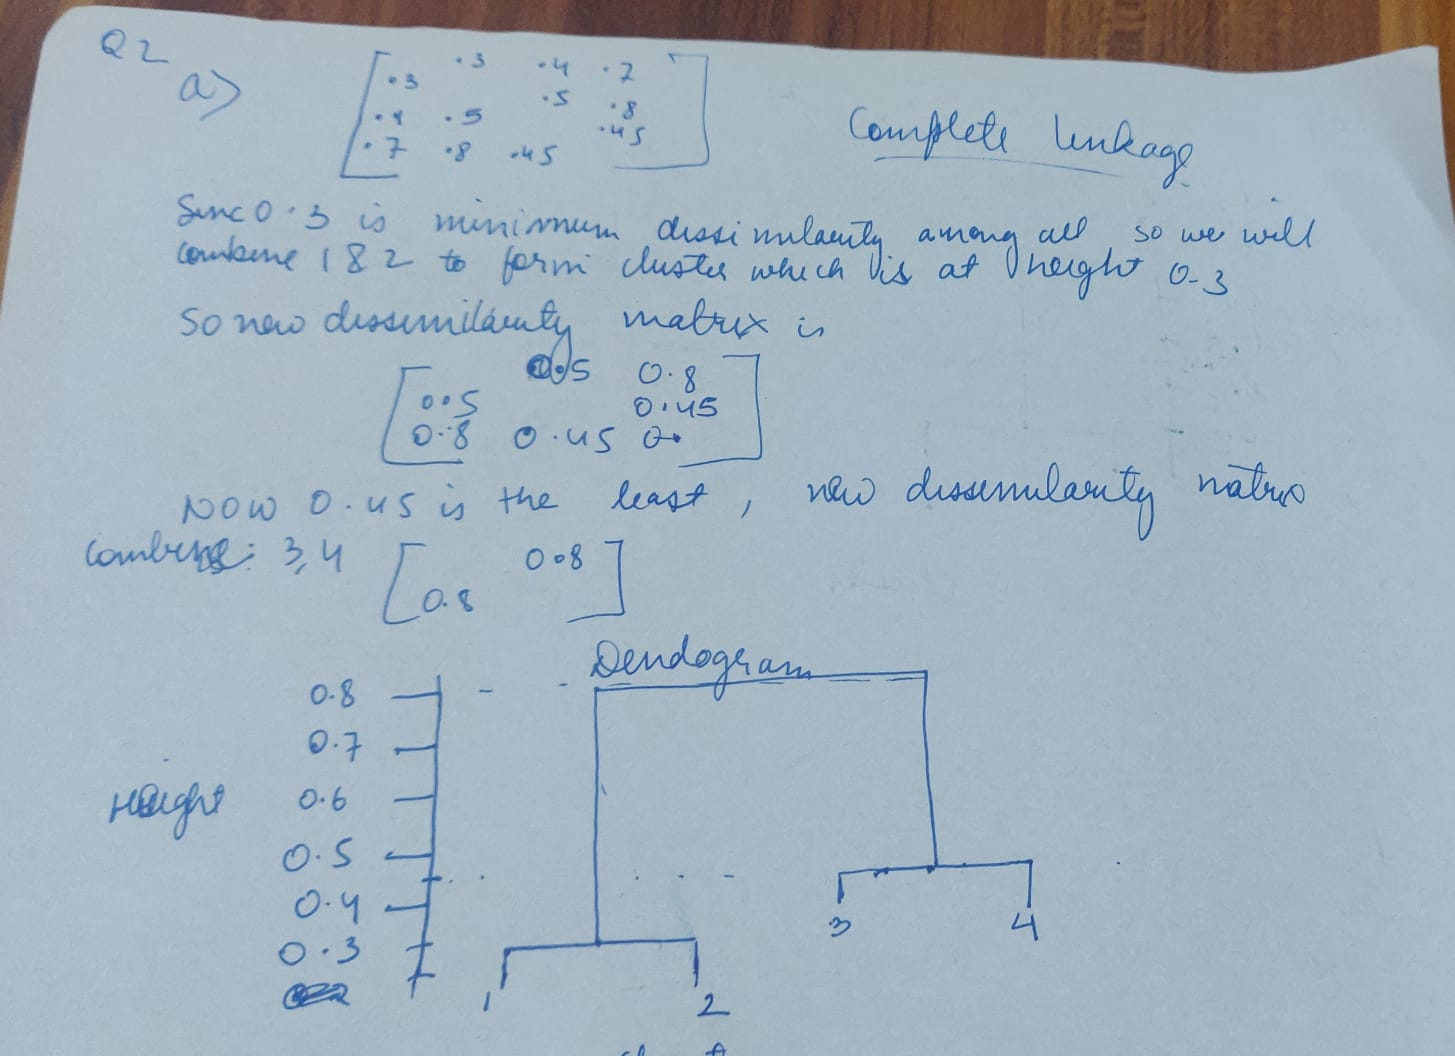

### b) Repeat (a), this time using single linkage clustering.


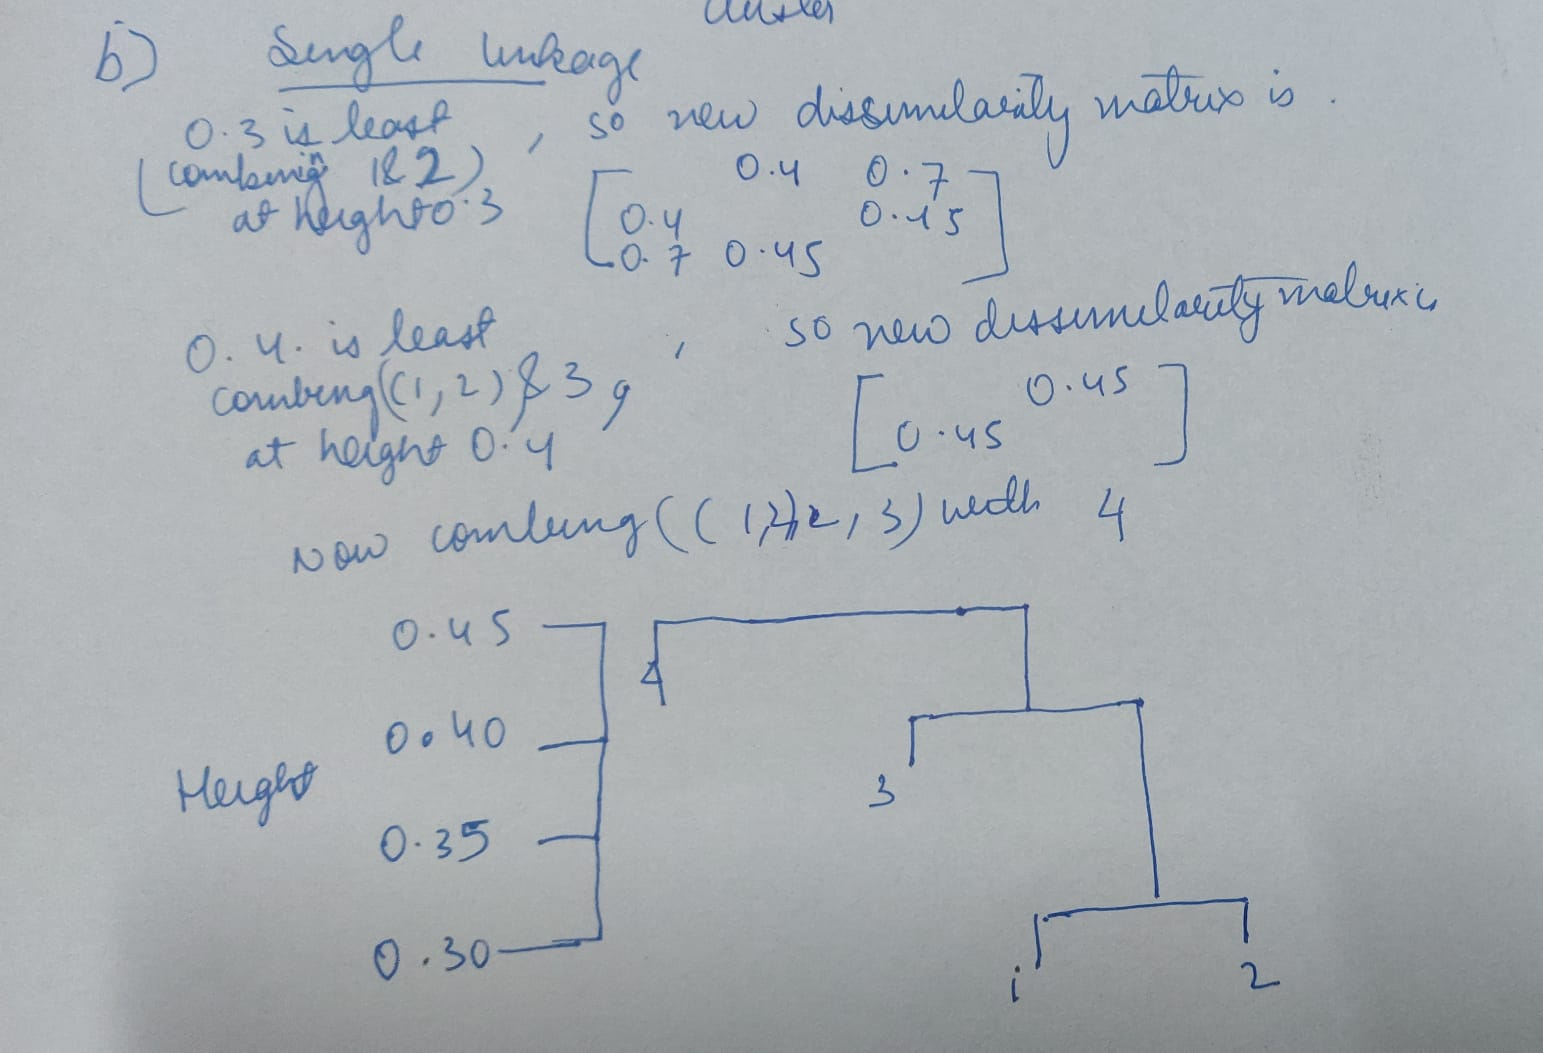

###  (c) Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?


Two clusters are : (1,2) and (3,4)

### (d) Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?

 Clusters: ((1,2),3) and (4)

### (e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

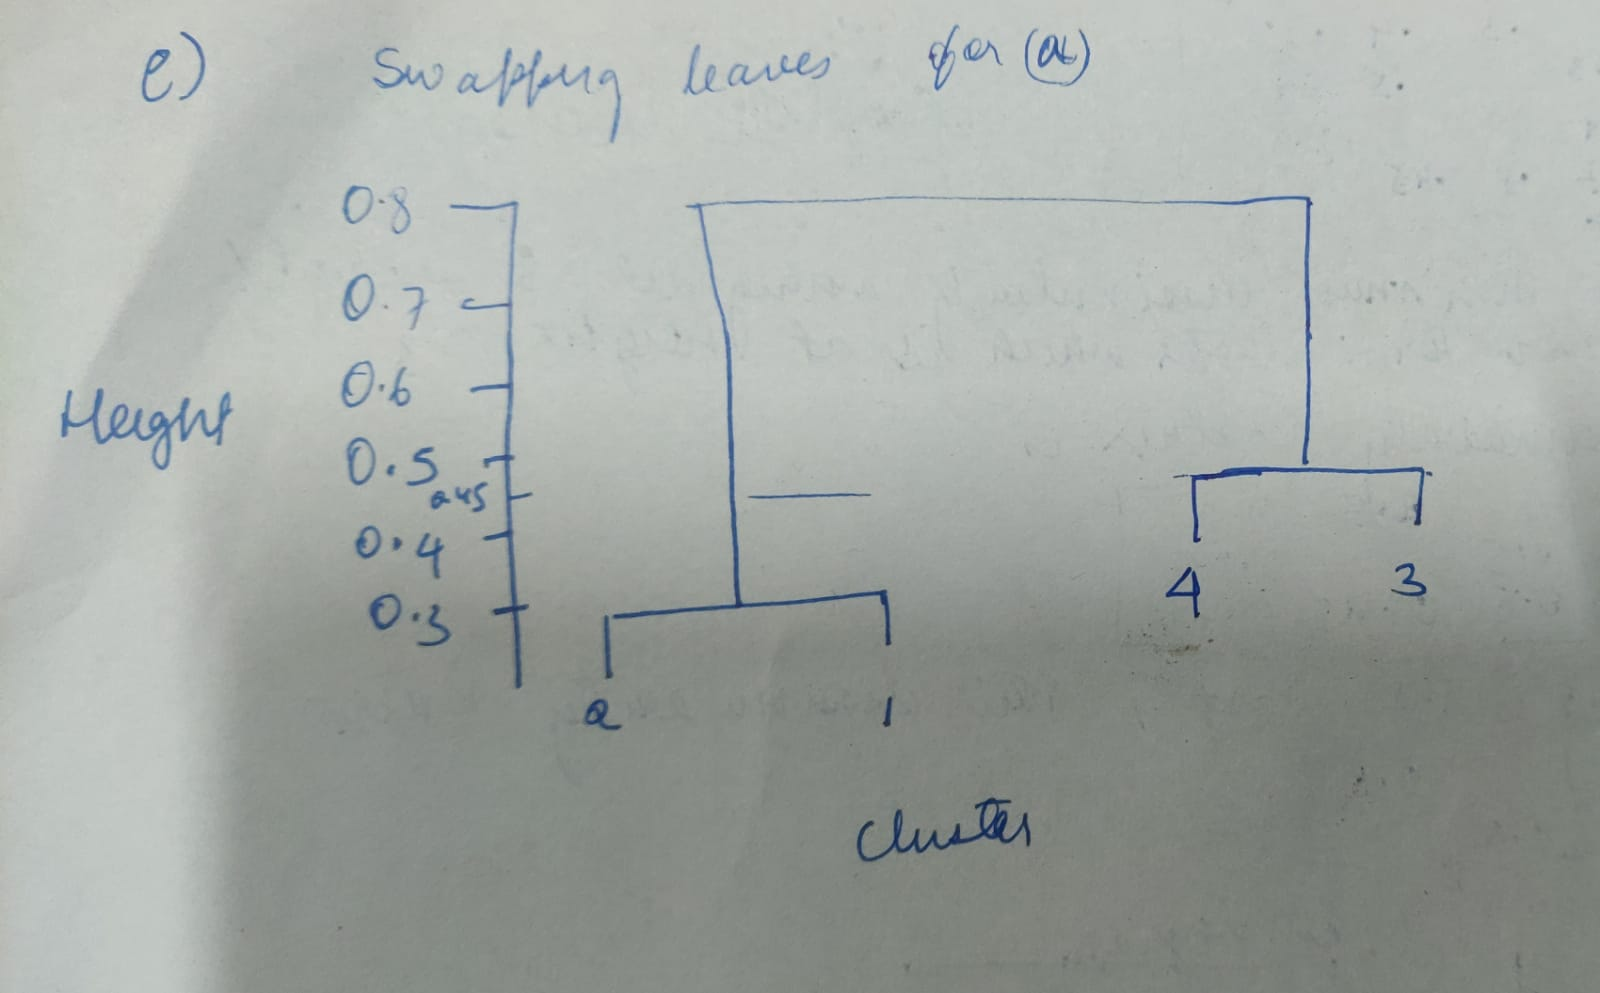

**References**

https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff
https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://www.linkedin.com/pulse/hamming-score-multi-label-classification-chandra-sharat/
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
https://en.wikipedia.org/wiki/Hamming_distance
https://towardsdatascience.com/fit-vs-predict-vs-fit-predict-in-python-scikit-learn-f15a34a8d39f